Importamos las librerías

In [145]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn import metrics

In [146]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

### Cargamos dataset de satelite

In [147]:
#drive_path = '/content/drive/MyDrive/Colab Notebooks/'

In [148]:
#!ls /content/drive/MyDrive/Colab\ Notebooks/

In [149]:
#df_sat = pd.read_csv(drive_path + 'S2_SR_USA_2017_2024_SCL.csv', sep=',')

In [150]:
datadir_path = os.path.join('..','data')
file_name = 'S2_SR_USA_2017_2024_SCL.csv'
dataset_path = os.path.join(datadir_path, file_name)

In [151]:
df_sat = pd.read_csv(dataset_path, sep=',')
df_sat.head()

,Unnamed: 0,id,longitude,latitude,time,B1,B2,B3,B4,B5,...,B8,B8A,B9,B11,B12,SCL,QA10,QA20,QA60,Site_sat
0,0,20171222T182749_20171222T183128_T12TUK,-112.452455,40.177600,1513967574868,3597.0,3704.0,3788.0,3972.0,4316.0,...,4272.0,4349.0,4724.0,1167.0,1091.0,11.0,NaN,NaN,0,Onaqui Ault
1,1,20171118T170559_20171118T170554_T15TYL,-89.586378,45.508922,1511025045890,8393.0,8072.0,7776.0,7568.0,7652.0,...,7632.0,7314.0,10924.0,2087.0,2396.0,8.0,NaN,NaN,1024,Steigerwaldt Land Services
2,2,20171225T165709_20171225T165708_T15TYL,-89.586378,45.508922,1514221250709,3381.0,3469.0,3256.0,3317.0,3473.0,...,4376.0,4062.0,3881.0,2315.0,1911.0,9.0,NaN,NaN,2048,Steigerwaldt Land Services
3,3,20171118T170559_20171118T170554_T15SUD,-95.192225,39.040513,1511025161923,7635.0,7848.0,7632.0,7480.0,7621.0,...,7944.0,7295.0,10781.0,1901.0,2098.0,8.0,NaN,NaN,1024,University of Kansas Field Site
4,4,20171118T170559_20171118T170554_T15TYM,-89.537510,46.234042,1511025031342,5584.0,5352.0,5124.0,5016.0,5094.0,...,4980.0,4760.0,6066.0,3001.0,2600.0,9.0,NaN,NaN,1024,Underc


In [152]:
df_sat.drop(columns=['Unnamed: 0'], inplace=True)

In [153]:
df_sat.head()

,id,longitude,latitude,time,B1,B2,B3,B4,B5,B6,...,B8,B8A,B9,B11,B12,SCL,QA10,QA20,QA60,Site_sat
0,20171222T182749_20171222T183128_T12TUK,-112.452455,40.177600,1513967574868,3597.0,3704.0,3788.0,3972.0,4316.0,4280.0,...,4272.0,4349.0,4724.0,1167.0,1091.0,11.0,NaN,NaN,0,Onaqui Ault
1,20171118T170559_20171118T170554_T15TYL,-89.586378,45.508922,1511025045890,8393.0,8072.0,7776.0,7568.0,7652.0,7527.0,...,7632.0,7314.0,10924.0,2087.0,2396.0,8.0,NaN,NaN,1024,Steigerwaldt Land Services
2,20171225T165709_20171225T165708_T15TYL,-89.586378,45.508922,1514221250709,3381.0,3469.0,3256.0,3317.0,3473.0,3863.0,...,4376.0,4062.0,3881.0,2315.0,1911.0,9.0,NaN,NaN,2048,Steigerwaldt Land Services
3,20171118T170559_20171118T170554_T15SUD,-95.192225,39.040513,1511025161923,7635.0,7848.0,7632.0,7480.0,7621.0,7438.0,...,7944.0,7295.0,10781.0,1901.0,2098.0,8.0,NaN,NaN,1024,University of Kansas Field Site
4,20171118T170559_20171118T170554_T15TYM,-89.537510,46.234042,1511025031342,5584.0,5352.0,5124.0,5016.0,5094.0,5038.0,...,4980.0,4760.0,6066.0,3001.0,2600.0,9.0,NaN,NaN,1024,Underc


Convertimos a tipo datetime la columna 'time' que está formato Unix epoch time.

In [154]:
#df_sat['time'] = df_sat['time'].apply(lambda x: dt.datetime.utcfromtimestamp(x / 1000))

In [155]:
df_sat['time'] = pd.to_datetime(df_sat['time'], unit='ms')

In [156]:
df_sat

,id,longitude,latitude,time,B1,B2,B3,B4,B5,B6,...,B8,B8A,B9,B11,B12,SCL,QA10,QA20,QA60,Site_sat
0,20171222T182749_20171222T183128_T12TUK,-112.452455,40.177600,2017-12-22 18:32:54.868,3597.0,3704.0,3788.0,3972.0,4316.0,4280.0,...,4272.0,4349.0,4724.0,1167.0,1091.0,11.0,NaN,NaN,0,Onaqui Ault
1,20171118T170559_20171118T170554_T15TYL,-89.586378,45.508922,2017-11-18 17:10:45.890,8393.0,8072.0,7776.0,7568.0,7652.0,7527.0,...,7632.0,7314.0,10924.0,2087.0,2396.0,8.0,NaN,NaN,1024,Steigerwaldt Land Services
2,20171225T165709_20171225T165708_T15TYL,-89.586378,45.508922,2017-12-25 17:00:50.709,3381.0,3469.0,3256.0,3317.0,3473.0,3863.0,...,4376.0,4062.0,3881.0,2315.0,1911.0,9.0,NaN,NaN,2048,Steigerwaldt Land Services
3,20171118T170559_20171118T170554_T15SUD,-95.192225,39.040513,2017-11-18 17:12:41.923,7635.0,7848.0,7632.0,7480.0,7621.0,7438.0,...,7944.0,7295.0,10781.0,1901.0,2098.0,8.0,NaN,NaN,1024,University of Kansas Field Site
4,20171118T170559_20171118T170554_T15TYM,-89.537510,46.234042,2017-11-18 17:10:31.342,5584.0,5352.0,5124.0,5016.0,5094.0,5038.0,...,4980.0,4760.0,6066.0,3001.0,2600.0,9.0,NaN,NaN,1024,Underc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,20241223T165721_20241223T165722_T16TCS,-89.537510,46.234042,2024-12-23 17:00:45.423,8182.0,7832.0,7664.0,7760.0,7922.0,7625.0,...,7528.0,7160.0,10498.0,5521.0,4969.0,9.0,NaN,NaN,1024,Underc
22971,20241226T170731_20241226T170725_T15TYM,-89.537510,46.234042,2024-12-26 17:10:44.865,6909.0,6812.0,6584.0,6668.0,6389.0,6487.0,...,6988.0,6562.0,3041.0,3747.0,3100.0,9.0,NaN,NaN,1024,Underc
22972,20241226T170731_20241226T170725_T16TCS,-89.537510,46.234042,2024-12-26 17:10:41.739,6915.0,6828.0,6584.0,6676.0,6391.0,6487.0,...,6988.0,6560.0,3040.0,3751.0,3099.0,9.0,NaN,NaN,1024,Underc
22973,20241228T165629_20241228T165645_T15TYM,-89.537510,46.234042,2024-12-28 17:00:49.197,6967.0,6704.0,6524.0,6496.0,6593.0,6559.0,...,6788.0,6422.0,7348.0,2348.0,2465.0,8.0,NaN,NaN,1024,Underc


Ordenamos el dataframe por Site y time, y reseteamos el indice.

In [157]:
df_sat.sort_values(by=['Site_sat','time'], inplace=True)
df_sat.reset_index(drop=True, inplace=True)

Eliminamos columnas innecesarias.  
QA10 y QA20 son columnas vacias.  
También descartamos las bandas de 60m que corresponden a aerosoles y vapor de agua: B1 y B9

In [158]:
df_sat.drop(columns=['B1', 'B9', 'QA10', 'QA20'], inplace=True)

In [159]:
df_sat.head()

,id,longitude,latitude,time,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,SCL,QA60,Site_sat
0,20180103T154629_20180103T154651_T18TYP,-71.287337,44.063892,2018-01-03 15:50:51.374,670.0,555.0,556.0,702.0,1291.0,1603.0,1448.0,1647.0,854.0,620.0,10.0,2048,Bartlett Experimental Forest
1,20180319T153941_20180319T153952_T19TCJ,-71.287337,44.063892,2018-03-19 15:50:53.419,1003.0,1133.0,1127.0,1198.0,1989.0,2271.0,2538.0,2407.0,882.0,580.0,5.0,2048,Bartlett Experimental Forest
2,20180319T153941_20180319T153952_T18TYP,-71.287337,44.063892,2018-03-19 15:50:57.571,525.0,670.0,821.0,1239.0,2013.0,2281.0,2163.0,2413.0,884.0,580.0,5.0,2048,Bartlett Experimental Forest
3,20180627T153911_20180627T154648_T19TCJ,-71.287337,44.063892,2018-06-27 15:50:57.171,2004.0,2130.0,1882.0,2485.0,3878.0,4306.0,4372.0,4374.0,1596.0,1270.0,8.0,2048,Bartlett Experimental Forest
4,20180627T153911_20180627T154648_T18TYP,-71.287337,44.063892,2018-06-27 15:51:01.324,1968.0,2062.0,1834.0,2166.0,3565.0,4148.0,4208.0,4327.0,1535.0,1099.0,8.0,2048,Bartlett Experimental Forest


In [160]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         22975 non-null  object        
 1   longitude  22975 non-null  float64       
 2   latitude   22975 non-null  float64       
 3   time       22975 non-null  datetime64[ns]
 4   B2         22959 non-null  float64       
 5   B3         22960 non-null  float64       
 6   B4         22960 non-null  float64       
 7   B5         22960 non-null  float64       
 8   B6         22960 non-null  float64       
 9   B7         22960 non-null  float64       
 10  B8         22960 non-null  float64       
 11  B8A        22960 non-null  float64       
 12  B11        22960 non-null  float64       
 13  B12        22960 non-null  float64       
 14  SCL        22960 non-null  float64       
 15  QA60       22975 non-null  int64         
 16  Site_sat   22975 non-null  object       

Eliminamos las filas (espectros) correspondientes a pixeles con nubes  
Los pixes con nubes corresponden a: QA60 == 512 or QA60 == 1024 or QA60 == 2048  
Por lo tanto nos quedamos solo con los pixeles libres de nubes: QA60 == 0

In [161]:
len(df_sat) # Antes de eliminar filas vemos el tamaño del dataset

22975

In [162]:
df_sat['QA60'].value_counts() # También vemos la cantidad de pixeles con nubes

QA60
0       15915
1024     5244
2048     1816
Name: count, dtype: int64

In [163]:
df_sat = df_sat[df_sat['QA60'] == 0] # Me quedo con las filas (pixeles) libre de nubes

In [164]:
len(df_sat) # Vemos como queda el tamaño del dataset luego de eliminar pixeles con nubes

15915

In [165]:
df_sat = df_sat[df_sat['SCL'] == 4] # Me quedo con las filas (pixeles) de vegetación

Escalamos las bandas a los valores de reflectancia reales (originalmente están multiplicados por 10000).

In [166]:
bandas = ['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']

In [167]:
for banda in bandas:
    df_sat.loc[:,banda] = df_sat[banda].astype(float)
    df_sat.loc[:,banda] = df_sat[banda] * 0.0001

In [168]:
df_sat.head()

,id,longitude,latitude,time,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,SCL,QA60,Site_sat
23,20190128T154519_20190128T154758_T19TCJ,-71.287337,44.063892,2019-01-28 15:50:57.000,0.0543,0.0520,0.0584,0.0665,0.1536,0.1727,0.2460,0.2054,0.0793,0.0550,4.0,0,Bartlett Experimental Forest
24,20190128T154519_20190128T154758_T18TYP,-71.287337,44.063892,2019-01-28 15:51:01.000,0.0251,0.0346,0.0358,0.0649,0.1531,0.1739,0.2365,0.2108,0.0815,0.0570,4.0,0,Bartlett Experimental Forest
33,20190222T154241_20190222T154730_T19TCJ,-71.287337,44.063892,2019-02-22 15:50:52.000,0.0642,0.0854,0.0816,0.0890,0.1784,0.2129,0.2199,0.2268,0.1014,0.0616,4.0,0,Bartlett Experimental Forest
34,20190222T154241_20190222T154730_T18TYP,-71.287337,44.063892,2019-02-22 15:50:56.000,0.0438,0.0541,0.0619,0.0842,0.1787,0.2139,0.1845,0.2290,0.1034,0.0623,4.0,0,Bartlett Experimental Forest
63,20190508T153819_20190508T154933_T19TCJ,-71.287337,44.063892,2019-05-08 15:51:05.057,0.0388,0.0560,0.0564,0.0942,0.1683,0.1943,0.2432,0.2120,0.1615,0.0985,4.0,0,Bartlett Experimental Forest


Eliminamos outliers

In [169]:
'''# Función para eliminar outliers basado en el IQR
def eliminar_outliers_iqr(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        limite_inferior = Q1 - 1.5 * IQR  # Límite inferior
        limite_superior = Q3 + 1.5 * IQR  # Límite superior

        # Filtrar los datos que están fuera de los límites
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df

# Eliminar outliers
df_sin_outliers = eliminar_outliers_iqr(df_sat, bandas)
df_sat = df_sin_outliers'''

'# Función para eliminar outliers basado en el IQR\ndef eliminar_outliers_iqr(df, columnas):\n    for columna in columnas:\n        Q1 = df[columna].quantile(0.25)  # Primer cuartil\n        Q3 = df[columna].quantile(0.75)  # Tercer cuartil\n        IQR = Q3 - Q1  # Rango intercuartílico\n        limite_inferior = Q1 - 1.5 * IQR  # Límite inferior\n        limite_superior = Q3 + 1.5 * IQR  # Límite superior\n\n        # Filtrar los datos que están fuera de los límites\n        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]\n    return df\n\n# Eliminar outliers\ndf_sin_outliers = eliminar_outliers_iqr(df_sat, bandas)\ndf_sat = df_sin_outliers'

Visualizamos muestras de los espectros de vegetación en un gráfico

In [170]:
# Definimos la longitud de on central de las bandas
longitudes_de_onda = {
    'B2': 490,  # Banda 2 (Azul)
    'B3': 560,  # Banda 3 (Verde)
    'B4': 665,  # Banda 4 (Rojo)
    'B5': 705,  # Banda 5
    'B6': 740,  # Banda 6
    'B7': 783,  # Banda 7
    'B8': 842,  # Banda 8 (Infrarrojo cercano)
    'B8A': 865, # Banda 8A
    'B11': 1610, # Banda 11 (Infrarrojo de onda corta)
    'B12': 2190  # Banda 12
}

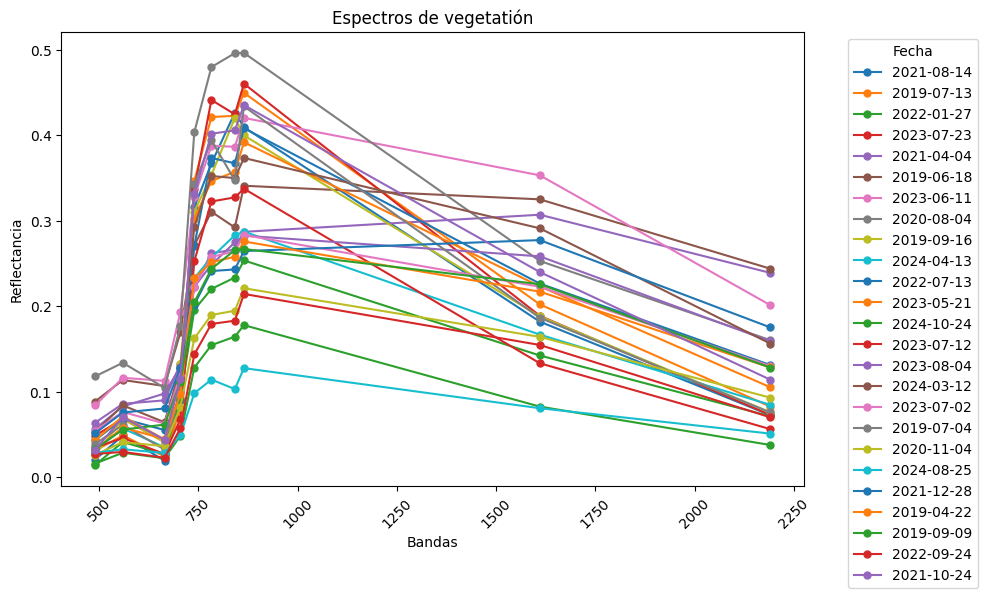

In [171]:
import matplotlib.pyplot as plt

# Graficar diferentes espectros
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura

for index, row in df_sat.sample(25).iterrows():
    plt.plot([longitudes_de_onda[band] for band in bandas], row[bandas], label=row['time'].strftime('%Y-%m-%d'), marker='o', linestyle='-', markersize=5)

# Configuración del gráfico
plt.title("Espectros de vegetatión")
plt.xlabel("Bandas")
plt.ylabel("Reflectancia")
plt.legend(title="Fecha", bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera de la gráfica

# Mostrar gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas de las bandas
plt.tight_layout()  # Ajustar el espacio
plt.show();

Calculamos el NDVI y graficamos series temporales de muestras de pixeles para verificar que se aproxima a la realidad

In [172]:
'''# Calcular NDVI para cada fila del DataFrame
df_sat['NDVI'] = (df_sat['B8'] - df_sat['B4']) / (df_sat['B8'] + df_sat['B4'])

# Graficar el NDVI para cada fecha
plt.figure(figsize=(12, 6))
plt.plot(df_sat['time'][100], df_sat['NDVI'][100], marker='o', linestyle='-', markersize=5)

# Configuración del gráfico
plt.title("NDVI de Vegetación usando Sentinel-2")
plt.xlabel("Fecha")
plt.ylabel("Valor de NDVI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()'''

'# Calcular NDVI para cada fila del DataFrame\ndf_sat[\'NDVI\'] = (df_sat[\'B8\'] - df_sat[\'B4\']) / (df_sat[\'B8\'] + df_sat[\'B4\'])\n\n# Graficar el NDVI para cada fecha\nplt.figure(figsize=(12, 6))\nplt.plot(df_sat[\'time\'][100], df_sat[\'NDVI\'][100], marker=\'o\', linestyle=\'-\', markersize=5)\n\n# Configuración del gráfico\nplt.title("NDVI de Vegetación usando Sentinel-2")\nplt.xlabel("Fecha")\nplt.ylabel("Valor de NDVI")\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()'

Image of vegetation phenology

![Image of vegetation phenology](https://www.scielo.org.mx/img/revistas/tl/v36n4//2395-8030-tl-36-04-393-gf1.png)

### Medidas insitu

Cargamos dataset de medidas in-situ

In [173]:
#!ls /content/drive/MyDrive/Colab\ Notebooks/

In [174]:
#df_insitu = pd.read_csv(drive_path + 'NEON_LAI_USA_2017_2024.csv', sep=',')

In [175]:
file_name = 'NEON_LAI_USA_2017_2024.csv'
dataset_path = os.path.join(datadir_path, file_name)

In [176]:
df_insitu = pd.read_csv(dataset_path, sep=',')

In [177]:
df_insitu.drop(columns=['Unnamed: 0'], inplace=True)

In [178]:
df_insitu.head()

,GBOV_ID,Site,GROUND_DATA_PI,GROUND_DATA_PIs_Email,GBOV_Email,Network,Elevation,IGBP_class,Lat_IS,Lon_IS,...,LAI_Miller_down_err,LAI_Warren_down_err,LAIe_Miller_down_err,LAIe_Warren_down_err,clumping_Miller_down,clumping_Warren_down,clumping_Miller_up_err,clumping_Warren_up_err,clumping_Miller_down_err,clumping_Warren_down_err
0,GBOV_RM7_1223,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.027,0.04,0.017,0.022,0.75,0.80,0.029,0.04,0.11,0.19
1,GBOV_RM7_1223,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GBOV_RM7_1235,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.11,0.18,0.07,0.11,0.76,0.74,0.033,0.05,0.08,0.17
3,GBOV_RM7_1235,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GBOV_RM7_1244,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.21,0.32,0.14,0.22,0.64,0.67,0.035,0.06,0.07,0.16


Limpieza inicial

In [179]:
'''columnas_sel = [
 'GBOV_ID',
 'Site',
 'Network',
 'Elevation',
 'IGBP_class',
 'Lat_IS',
 'Lon_IS',
 'TIME_IS',
 'Version',
 'up_flag',
 'down_flag',
 'LAIe_Miller_up',
 'LAIe_Miller_down',
 'LAIe_Miller_up_err',
 'LAIe_Miller_down_err']'''


"columnas_sel = [\n 'GBOV_ID',\n 'Site',\n 'Network',\n 'Elevation',\n 'IGBP_class',\n 'Lat_IS',\n 'Lon_IS',\n 'TIME_IS',\n 'Version',\n 'up_flag',\n 'down_flag',\n 'LAIe_Miller_up',\n 'LAIe_Miller_down',\n 'LAIe_Miller_up_err',\n 'LAIe_Miller_down_err']"

Eliminamos columnas innecesarias

In [180]:
#df_insitu.drop([col for col in df_insitu.columns if col not in columnas_sel], axis=1, inplace=True)

Eliminamos filas antes de calcular el LAI

In [181]:
# Reemplazar todos los valores -999 por NaN
df_insitu.replace(-999.0, np.nan, inplace=True)
len(df_insitu)

9406

In [182]:
# Reemplazar todos los valores -999 por NaN
df_insitu.replace('-999.0', np.nan, inplace=True)
len(df_insitu)

9406

In [183]:
#Eliminamos las filas vacias
df_insitu.dropna(how = 'all', inplace=True)
len(df_insitu)

9406

Preparamos filas antes de calcular el LAI

In [184]:
# Asignamos valor nulo a las up_flags diferente de cero.
# Nos quedamos con las quality flags=0 que son las que garantizan mejor calidad de las medidas
mask_invalid_up = df_insitu['up_flag'] != 0
df_insitu.loc[mask_invalid_up,['up_flag','LAIe_Warren_up','LAIe_Warren_up_err']] = np.nan

In [185]:
# Asignamos valor nulo a las down_flags diferente de cero.
# Nos quedamos con las quality flags=0 que son las que garantizan mejor calidad de las medidas
mask_invalid_down = df_insitu['down_flag'] != 0
df_insitu.loc[mask_invalid_down,['down_flag','LAIe_Warren_down','LAIe_Warren_down_err']] = np.nan

In [186]:
# Eliminamos filas donde las flags son nulas
df_insitu.dropna(subset=['up_flag','down_flag'], how='all', inplace=True)
len(df_insitu)

7486

Limpiamos las columnas numericas de caracteres indeseados.  


In [187]:
#Eliminamos los parentesis que aparezcan.
#df_insitu['LAIe_Warren_up'] = df_insitu['LAIe_Warren_up'].str.replace('(', '').str.replace(')', '')
df_insitu['LAIe_Warren_down'] = df_insitu['LAI_Warren_down'].str.replace('(', '').str.replace(')', '')
#df_insitu['LAIe_Warren_up_err'] = df_insitu['LAIe_Warren_up_err'].str.replace('(', '').str.replace(')', '')
df_insitu['LAIe_Warren_down_err'] = df_insitu['LAIe_Warren_down_err'].str.replace('(', '').str.replace(')', '')

In [188]:
'''#Eliminamos los parentesis que aparezcan.
#df_insitu['LAIe_Miller_up'] = df_insitu['LAIe_Miller_up'].str.replace('(', '').str.replace(')', '')
df_insitu['LAIe_Miller_down'] = df_insitu['LAIe_Miller_down'].str.replace('(', '').str.replace(')', '')
#df_insitu['LAIe_Miller_up_err'] = df_insitu['LAIe_Miller_up_err'].str.replace('(', '').str.replace(')', '')
df_insitu['LAIe_Miller_down_err'] = df_insitu['LAIe_Miller_down_err'].str.replace('(', '').str.replace(')', '')'''

"#Eliminamos los parentesis que aparezcan.\n#df_insitu['LAIe_Miller_up'] = df_insitu['LAIe_Miller_up'].str.replace('(', '').str.replace(')', '')\ndf_insitu['LAIe_Miller_down'] = df_insitu['LAIe_Miller_down'].str.replace('(', '').str.replace(')', '')\n#df_insitu['LAIe_Miller_up_err'] = df_insitu['LAIe_Miller_up_err'].str.replace('(', '').str.replace(')', '')\ndf_insitu['LAIe_Miller_down_err'] = df_insitu['LAIe_Miller_down_err'].str.replace('(', '').str.replace(')', '')"

In [189]:
# Verificar y convertir solo si la columna no es de tipo float
if df_insitu['LAIe_Warren_up'].dtype != 'float':
    df_insitu['LAIe_Warren_up'] = df_insitu['LAIe_Warren_up'].astype(float)

if df_insitu['LAIe_Warren_down'].dtype != 'float':
    df_insitu['LAIe_Warren_down'] = df_insitu['LAIe_Warren_down'].astype(float)

if df_insitu['LAIe_Warren_up_err'].dtype != 'float':
    df_insitu['LAIe_Warren_up_err'] = df_insitu['LAIe_Warren_up_err'].astype(float)

if df_insitu['LAIe_Warren_down_err'].dtype != 'float':
    df_insitu['LAIe_Warren_down_err'] = df_insitu['LAIe_Warren_down_err'].astype(float)

Convertimos a float las columnas numericas necesarias para calcular LAI

In [190]:
'''# Verificar y convertir solo si la columna no es de tipo float
if df_insitu['LAIe_Miller_up'].dtype != 'float':
    df_insitu['LAIe_Miller_up'] = df_insitu['LAIe_Miller_up'].astype(float)

if df_insitu['LAIe_Miller_down'].dtype != 'float':
    df_insitu['LAIe_Miller_down'] = df_insitu['LAIe_Miller_down'].astype(float)

if df_insitu['LAIe_Miller_up_err'].dtype != 'float':
    df_insitu['LAIe_Miller_up_err'] = df_insitu['LAIe_Miller_up_err'].astype(float)

if df_insitu['LAIe_Miller_down_err'].dtype != 'float':
    df_insitu['LAIe_Miller_down_err'] = df_insitu['LAIe_Miller_down_err'].astype(float)'''

"# Verificar y convertir solo si la columna no es de tipo float\nif df_insitu['LAIe_Miller_up'].dtype != 'float':\n    df_insitu['LAIe_Miller_up'] = df_insitu['LAIe_Miller_up'].astype(float)\n\nif df_insitu['LAIe_Miller_down'].dtype != 'float':\n    df_insitu['LAIe_Miller_down'] = df_insitu['LAIe_Miller_down'].astype(float)\n\nif df_insitu['LAIe_Miller_up_err'].dtype != 'float':\n    df_insitu['LAIe_Miller_up_err'] = df_insitu['LAIe_Miller_up_err'].astype(float)\n\nif df_insitu['LAIe_Miller_down_err'].dtype != 'float':\n    df_insitu['LAIe_Miller_down_err'] = df_insitu['LAIe_Miller_down_err'].astype(float)"

In [191]:
df_insitu.columns

Index(['GBOV_ID', 'Site', 'GROUND_DATA_PI', 'GROUND_DATA_PIs_Email',
       'GBOV_Email', 'Network', 'Elevation', 'IGBP_class', 'Lat_IS', 'Lon_IS',
       'TIME_IS', 'Version', 'up_flag', 'down_flag', 'LAI_Miller_up',
       'LAI_Warren_up', 'LAIe_Miller_up', 'LAIe_Warren_up', 'LAI_Miller_down',
       'LAI_Warren_down', 'LAIe_Miller_down', 'LAIe_Warren_down',
       'LAI_Miller_up_err', 'LAI_Warren_up_err', 'LAIe_Miller_up_err',
       'LAIe_Warren_up_err', 'clumping_Miller_up', 'clumping_Warren_up',
       'LAI_Miller_down_err', 'LAI_Warren_down_err', 'LAIe_Miller_down_err',
       'LAIe_Warren_down_err', 'clumping_Miller_down', 'clumping_Warren_down',
       'clumping_Miller_up_err', 'clumping_Warren_up_err',
       'clumping_Miller_down_err', 'clumping_Warren_down_err'],
      dtype='object')

In [192]:
df_insitu.IGBP_class.value_counts()

IGBP_class
Mixed Forest                   1431
Grasslands                     1164
Open Shrublands                1059
Evergreen Needleleaf           1023
Deciduous Broadleaf             785
Deciduous Broadleaf Forest      661
Croplands                       524
Evergreen Broadleaf             332
Closed Shrublands               277
Evergreen Needleleaf Forest     230
Name: count, dtype: int64

Calculamos el LAI effective y el error de LAI effective

In [193]:
df_insitu['IGBP_class'].value_counts()

IGBP_class
Mixed Forest                   1431
Grasslands                     1164
Open Shrublands                1059
Evergreen Needleleaf           1023
Deciduous Broadleaf             785
Deciduous Broadleaf Forest      661
Croplands                       524
Evergreen Broadleaf             332
Closed Shrublands               277
Evergreen Needleleaf Forest     230
Name: count, dtype: int64

In [194]:
#df_insitu['IGBP_class'].unique().tolist()

Mixed forest
Evergreen needleleaf
Shrub/scrub
Cultivated crops
Grassland/herbaceuous
Deciduous broadleaf
Evergreen broadleaf
Pasture/hay

Woody wetlands

In [195]:
class_forest = ['Mixed Forest', 'Evergreen Needleleaf', 'Deciduous Broadleaf Forest', 'Evergreen Broadleaf', 'Evergreen Needleleaf Forest','Deciduous Broadleaf']

In [196]:
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & ~df_insitu['LAIe_Warren_up'].isnull() & ~df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up'] + df_insitu['LAIe_Warren_down'] 
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & ~df_insitu['LAIe_Warren_up'].isnull() & df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = np.nan
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & df_insitu['LAIe_Warren_up'].isnull() & ~df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = np.nan


#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (df_insitu['IGBP_class'].isin(class_forest)), 'LAIe_Warren'] = np.nan # Descartamos las medidas de forest cuando son solo upwards
#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (~df_insitu['IGBP_class'].isin(class_forest)), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up']
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAIe_Warren'] = np.nan

df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0) , 'LAIe_Warren'] = np.nan

In [197]:
'''df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & ~df_insitu['LAIe_Warren_up'].isnull() & ~df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up'] + df_insitu['LAIe_Warren_down'] 
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & ~df_insitu['LAIe_Warren_up'].isnull() & df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up']
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & df_insitu['LAIe_Warren_up'].isnull() & ~df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = df_insitu['LAIe_Warren_down']


#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (df_insitu['IGBP_class'].isin(class_forest)), 'LAIe_Warren'] = np.nan # Descartamos las medidas de forest cuando son solo upwards
#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (~df_insitu['IGBP_class'].isin(class_forest)), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up']
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up']

df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0) , 'LAIe_Warren'] = df_insitu['LAIe_Warren_down']'''

"df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & ~df_insitu['LAIe_Warren_up'].isnull() & ~df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up'] + df_insitu['LAIe_Warren_down'] \ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & ~df_insitu['LAIe_Warren_up'].isnull() & df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = df_insitu['LAIe_Warren_up']\ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0) & df_insitu['LAIe_Warren_up'].isnull() & ~df_insitu['LAIe_Warren_down'].isnull(), 'LAIe_Warren'] = df_insitu['LAIe_Warren_down']\n\n\n#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (df_insitu['IGBP_class'].isin(class_forest)), 'LAIe_Warren'] = np.nan # Descartamos las medidas de forest cuando son solo upwards\n#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (~df_insitu['IGBP_class'].isin(class_forest)), 'LAIe_Warren'

In [198]:
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (~df_insitu['IGBP_class'].isin(class_forest))][['IGBP_class','LAIe_Warren_up','LAIe_Warren_down']]

,IGBP_class,LAIe_Warren_up,LAIe_Warren_down
1271,Grasslands,NaN,0.699797
1273,Grasslands,NaN,0.165214
1275,Grasslands,NaN,1.013405
1575,Grasslands,NaN,0.419491
1578,Grasslands,NaN,0.319780
...,...,...,...
4851,Croplands,1.855035,0.125652
4854,Croplands,3.707736,0.470028
4856,Croplands,3.729358,0.697041
4858,Croplands,3.935942,0.250988


In [199]:
'''df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAI_Warren'] = df_insitu['LAI_Warren_up'] + df_insitu['LAI_Warren_down'] 
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAI_Warren_err'] = df_insitu['LAI_Warren_up_err'] + df_insitu['LAI_Warren_down_err']

#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (df_insitu['IGBP_class'] == 'Grasslands'), 'LAI_Warren'] = df_insitu['LAI_Warren_up']
#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (df_insitu['IGBP_class'] != 'Grasslands'), 'LAI_Warren'] = np.nan # df_insitu['LAI_Warren_up']
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAI_Warren'] = df_insitu['LAI_Warren_up']

df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAI_Warren_err'] = df_insitu['LAI_Warren_up_err']

#df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0) & (df_insitu['IGBP_class'] == 'Grasslands'), 'LAI_Warren'] = df_insitu['LAI_Warren_down']
#df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0) & (df_insitu['IGBP_class'] != 'Grasslands'), 'LAI_Warren'] = np.nan #df_insitu['LAI_Warren_down']
df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0), 'LAI_Warren'] = df_insitu['LAI_Warren_down']

df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0), 'LAI_Warren_err'] = df_insitu['LAI_Warren_down_err']'''

"df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAI_Warren'] = df_insitu['LAI_Warren_up'] + df_insitu['LAI_Warren_down'] \ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAI_Warren_err'] = df_insitu['LAI_Warren_up_err'] + df_insitu['LAI_Warren_down_err']\n\n#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (df_insitu['IGBP_class'] == 'Grasslands'), 'LAI_Warren'] = df_insitu['LAI_Warren_up']\n#df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()) & (df_insitu['IGBP_class'] != 'Grasslands'), 'LAI_Warren'] = np.nan # df_insitu['LAI_Warren_up']\ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAI_Warren'] = df_insitu['LAI_Warren_up']\n\ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAI_Warren_err'] = df_insitu['LAI_Warren_up_err']\n\n#df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0) & 

In [200]:
'''df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAIe_Miller'] = df_insitu['LAIe_Miller_up'] + df_insitu['LAIe_Miller_down']
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAIe_Miller_err'] = df_insitu['LAIe_Miller_up_err'] + df_insitu['LAIe_Miller_down_err']

df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAIe_Miller'] = df_insitu['LAIe_Miller_up']
df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAIe_Miller_err'] = df_insitu['LAIe_Miller_up_err']

df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0), 'LAIe_Miller'] = df_insitu['LAIe_Miller_down']
df_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0), 'LAIe_Miller_err'] = df_insitu['LAIe_Miller_down_err']'''

"df_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAIe_Miller'] = df_insitu['LAIe_Miller_up'] + df_insitu['LAIe_Miller_down']\ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'] == 0), 'LAIe_Miller_err'] = df_insitu['LAIe_Miller_up_err'] + df_insitu['LAIe_Miller_down_err']\n\ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAIe_Miller'] = df_insitu['LAIe_Miller_up']\ndf_insitu.loc[(df_insitu['up_flag'] == 0) & (df_insitu['down_flag'].isnull()), 'LAIe_Miller_err'] = df_insitu['LAIe_Miller_up_err']\n\ndf_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0), 'LAIe_Miller'] = df_insitu['LAIe_Miller_down']\ndf_insitu.loc[(df_insitu['up_flag'].isnull()) & (df_insitu['down_flag'] == 0), 'LAIe_Miller_err'] = df_insitu['LAIe_Miller_down_err']"

In [201]:
# Eliminamos las filas donde el LAI es nulo
df_insitu.dropna(subset=['LAIe_Warren'], inplace=True)
len(df_insitu)

3786

In [202]:
df_insitu.head()

,GBOV_ID,Site,GROUND_DATA_PI,GROUND_DATA_PIs_Email,GBOV_Email,Network,Elevation,IGBP_class,Lat_IS,Lon_IS,...,LAI_Warren_down_err,LAIe_Miller_down_err,LAIe_Warren_down_err,clumping_Miller_down,clumping_Warren_down,clumping_Miller_up_err,clumping_Warren_up_err,clumping_Miller_down_err,clumping_Warren_down_err,LAIe_Warren
0,GBOV_RM7_1223,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.04,0.017,0.022,0.75,0.80,0.029,0.04,0.11,0.19,2.88
2,GBOV_RM7_1235,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.18,0.07,0.110,0.76,0.74,0.033,0.05,0.08,0.17,3.68
4,GBOV_RM7_1244,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.32,0.14,0.220,0.64,0.67,0.035,0.06,0.07,0.16,5.13
6,GBOV_RM7_1211,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.14,0.09,0.120,0.74,0.79,0.029,0.05,0.05,0.09,4.89
8,GBOV_RM7_1253,Harvard Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,351,Mixed Forest,42.5378,-72.171501,...,0.1,0.06,0.070,0.77,0.83,0.030,0.05,0.08,0.14,4.23


In [203]:
df_insitu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 0 to 9402
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GBOV_ID                   3786 non-null   object 
 1   Site                      3786 non-null   object 
 2   GROUND_DATA_PI            3584 non-null   object 
 3   GROUND_DATA_PIs_Email     3584 non-null   object 
 4   GBOV_Email                3786 non-null   object 
 5   Network                   3786 non-null   object 
 6   Elevation                 3786 non-null   int64  
 7   IGBP_class                3786 non-null   object 
 8   Lat_IS                    3786 non-null   float64
 9   Lon_IS                    3786 non-null   float64
 10  TIME_IS                   3786 non-null   object 
 11  Version                   3786 non-null   float64
 12  up_flag                   3786 non-null   float64
 13  down_flag                 3786 non-null   float64
 14  LAI_Miller_up

### Hacemos el merge de los dos datasets

In [204]:
# Convertimos la columna de la fecha a formato datetime.
df_insitu['TIME_IS'] = pd.to_datetime(df_insitu['TIME_IS']).dt.tz_localize(None)

In [205]:
df_insitu.TIME_IS

0      2018-08-13
2      2018-08-13
4      2018-08-13
6      2018-08-13
8      2018-08-13
          ...    
9394   2018-08-14
9396   2018-08-14
9398   2018-08-14
9400   2018-08-15
9402   2018-08-13
Name: TIME_IS, Length: 3786, dtype: datetime64[ns]

In [206]:
df_coord = df_insitu[['Site','Lat_IS', 'Lon_IS']].drop_duplicates()
coordenadas = tuple(zip(df_coord['Site'].values.tolist(), df_coord['Lat_IS'].values.tolist(), df_coord['Lon_IS'].values.tolist()))
coordenadas

(('Harvard Forest', 42.5377998352051, -72.171501159668),
 ('Jones Ecological Research Center', 31.1948394775391, -84.468777),
 ('Lenoir Landing', 31.853861, -88.161181),
 ('Moab', 38.24836, -109.38831),
 ('Niwot Ridge Mountain Research Station', 40.0543, -105.58245),
 ('Onaqui Ault', 40.1775894165039, -112.452438354492),
 ('Oak Ridge', 35.9641189575195, -84.282600402832),
 ('Ordway Swisher Biological Station', 29.6839, -81.9934),
 ('Pu u Maka ala Natural Area Reserve', 19.55309, -155.31731),
 ('Smithsonian Conservation Biology Institute',
  38.8929214477539,
  -78.1395034790039),
 ('Smithsonian Environmental Research Center', 38.89016, -76.5601),
 ('Soaproot Saddle', 37.03337, -119.26219),
 ('Steigerwaldt Land Services', 45.5089416503906, -89.5863723754883),
 ('Talladega National Forest', 32.9504585266113, -87.3932723999023),
 ('Lower Teakettle', 37.00583, -119.00602),
 ('University of Kansas Field Site', 39.040431, -95.19215),
 ('Underc', 46.233959, -89.53751),
 ('Bartlett Experimenta

Para cada site identificamos las medidas in_situ mas cercanas a la fecha de adquisicion del satélite

In [207]:
df_list = []

# Itera sobre cada coordenada
for site, lat, lon in coordenadas:
    # Filtra el DataFrame de df_insitu y df según el 'Site'
    df_insitu_site = df_insitu[df_insitu['Site'] == site]
    df_sat_site = df_sat[df_sat['Site_sat'] == site]

    rows = []

    # Itera sobre los datos de satélite y datos in situ
    for index_sat, date_sat in df_sat_site['time'].items():
        for index_insitu, date_insitu in df_insitu_site['TIME_IS'].items():
            # Calcula la diferencia en días entre las fechas
            dif = (date_insitu - date_sat) / np.timedelta64(1, 'D')

            if abs(dif) <= 5: # Diferencia maxima (en días) entre la medida de satelite y la  medida in situ
                # Crea una lista con la fila combinada de ambas fuentes
                row = list(df_sat_site.loc[index_sat]) + list(df_insitu_site.loc[index_insitu])
                rows.append(row)

    # Si se encontraron filas, procesa los datos
    if rows:
        # Crear el DataFrame con las filas acumuladas
        df_cross_site = pd.DataFrame(rows, columns=list(df_sat_site.columns) + list(df_insitu_site.columns))

        # Añadir una columna 'delta' con la diferencia en tiempo entre el satélite y las mediciones in situ
        df_cross_site['delta'] = abs(df_cross_site['time'] - df_cross_site['TIME_IS'])

        # Añadir las fechas separadas de 'date_sat' y 'date_insitu'
        df_cross_site['date_sat'] = df_cross_site['time'].dt.date
        df_cross_site['date_insitu'] = df_cross_site['TIME_IS'].dt.date

        # Ordenar y eliminar duplicados por 'date_insitu'
        df_cross_site = df_cross_site.sort_values(by=['date_insitu', 'delta']).drop_duplicates(subset='date_insitu', keep='first')

        # Ordenar y eliminar duplicados por 'date_sat'
        df_cross_site = df_cross_site.sort_values(by=['date_sat', 'delta']).drop_duplicates(subset='date_sat', keep='first')



        # Agregar el DataFrame de este sitio a la lista
        df_list.append(df_cross_site)

# Combinar todos los DataFrames en uno solo
df_cross = pd.concat(df_list, axis=0, ignore_index=True)

# Mostrar el DataFrame final
df_cross

,id,longitude,latitude,time,B2,B3,B4,B5,B6,B7,...,clumping_Miller_down,clumping_Warren_down,clumping_Miller_up_err,clumping_Warren_up_err,clumping_Miller_down_err,clumping_Warren_down_err,LAIe_Warren,delta,date_sat,date_insitu
0,20190607T153819_20190607T154303_T18TYN,-72.171458,42.537834,2019-06-07 15:51:23.000,0.0198,0.0532,0.0169,0.0982,0.3507,0.4087,...,0.810000,0.860000,0.029000,0.040000,0.090000,0.150000,3.090000,3 days 10:17:23,2019-06-07,2019-06-04
1,20190627T153819_20190627T154123_T18TYN,-72.171458,42.537834,2019-06-27 15:51:23.000,0.0236,0.0405,0.0193,0.0782,0.3244,0.4116,...,0.810000,0.900000,0.027000,0.040000,0.100000,0.190000,3.660000,4 days 13:44:37,2019-06-27,2019-07-02
2,20190712T153911_20190712T154425_T18TYN,-72.171458,42.537834,2019-07-12 15:51:20.431,0.0197,0.0203,0.0126,0.0247,0.0888,0.1154,...,0.880000,0.910000,0.027000,0.040000,0.110000,0.180000,2.881000,3 days 13:53:39.569000,2019-07-12,2019-07-16
3,20190801T153911_20190801T154113_T18TYN,-72.171458,42.537834,2019-08-01 15:51:19.875,0.0176,0.0422,0.0188,0.0757,0.3112,0.3827,...,0.780000,0.780000,0.030000,0.050000,0.080000,0.150000,2.880000,2 days 09:45:19.875000,2019-08-01,2019-07-30
4,20190826T153819_20190826T154455_T18TYN,-72.171458,42.537834,2019-08-26 15:51:19.743,0.0204,0.0405,0.0182,0.0711,0.2746,0.3450,...,0.920000,0.960000,0.029000,0.050000,0.060000,0.090000,3.021000,0 days 14:23:40.257000,2019-08-26,2019-08-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,20230805T162841_20230805T163154_T16SDB,-87.803941,32.541741,2023-08-05 16:44:29.104,0.0282,0.0436,0.0248,0.0699,0.2208,0.2724,...,0.855783,0.872145,0.026653,0.042525,0.032897,0.053472,5.033801,4 days 10:09:29.104000,2023-08-05,2023-08-01
667,20230810T162839_20230810T163908_T16SDB,-87.803941,32.541741,2023-08-10 16:44:29.699,0.0341,0.0420,0.0266,0.0702,0.2363,0.3045,...,0.945036,0.940919,0.019486,0.038817,0.086077,0.158548,2.921469,4 days 13:48:30.301000,2023-08-10,2023-08-15
668,20230825T162841_20230825T164158_T16SDB,-87.803941,32.541741,2023-08-25 16:44:30.176,0.0336,0.0402,0.0270,0.0686,0.2033,0.2600,...,0.873282,0.870323,0.017970,0.036711,0.086457,0.172290,3.461245,3 days 13:50:29.824000,2023-08-25,2023-08-29
669,20231009T163109_20231009T164356_T16SDB,-87.803941,32.541741,2023-10-09 16:44:25.508,0.0155,0.0236,0.0172,0.0523,0.1411,0.1689,...,0.923080,0.963150,0.019733,0.038110,0.088583,0.092982,3.096709,1 days 14:27:34.492000,2023-10-09,2023-10-11


In [208]:
#df_cross.sort_index()[['Site','id','date_sat','date_insitu','time','TIME_IS','delta']]

In [209]:
#df_cross = df_cross.sort_values(by = ['Site','time']).reset_index(drop=True)

In [210]:
df_cross[['Site','id','date_sat','date_insitu','time','TIME_IS','delta']]

,Site,id,date_sat,date_insitu,time,TIME_IS,delta
0,Harvard Forest,20190607T153819_20190607T154303_T18TYN,2019-06-07,2019-06-04,2019-06-07 15:51:23.000,2019-06-04 05:34:00,3 days 10:17:23
1,Harvard Forest,20190627T153819_20190627T154123_T18TYN,2019-06-27,2019-07-02,2019-06-27 15:51:23.000,2019-07-02 05:36:00,4 days 13:44:37
2,Harvard Forest,20190712T153911_20190712T154425_T18TYN,2019-07-12,2019-07-16,2019-07-12 15:51:20.431,2019-07-16 05:45:00,3 days 13:53:39.569000
3,Harvard Forest,20190801T153911_20190801T154113_T18TYN,2019-08-01,2019-07-30,2019-08-01 15:51:19.875,2019-07-30 06:06:00,2 days 09:45:19.875000
4,Harvard Forest,20190826T153819_20190826T154455_T18TYN,2019-08-26,2019-08-27,2019-08-26 15:51:19.743,2019-08-27 06:15:00,0 days 14:23:40.257000
...,...,...,...,...,...,...,...
666,Dead Lake,20230805T162841_20230805T163154_T16SDB,2023-08-05,2023-08-01,2023-08-05 16:44:29.104,2023-08-01 06:35:00,4 days 10:09:29.104000
667,Dead Lake,20230810T162839_20230810T163908_T16SDB,2023-08-10,2023-08-15,2023-08-10 16:44:29.699,2023-08-15 06:33:00,4 days 13:48:30.301000
668,Dead Lake,20230825T162841_20230825T164158_T16SDB,2023-08-25,2023-08-29,2023-08-25 16:44:30.176,2023-08-29 06:35:00,3 days 13:50:29.824000
669,Dead Lake,20231009T163109_20231009T164356_T16SDB,2023-10-09,2023-10-11,2023-10-09 16:44:25.508,2023-10-11 07:12:00,1 days 14:27:34.492000


Seleccion de features

In [211]:
features_sel = ['Site',
 'Lat_IS',
 'Lon_IS',
 'date_sat',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B11',
 'B12',
 'NDVI',
 'Network',
 'Elevation',
 'IGBP_class',
 'date_insitu',
 'delta',
 'LAIe_Miller',
 'LAIe_Miller_err']

In [212]:
#df_cross = df_cross[features_sel]

In [213]:
df_cross

,id,longitude,latitude,time,B2,B3,B4,B5,B6,B7,...,clumping_Miller_down,clumping_Warren_down,clumping_Miller_up_err,clumping_Warren_up_err,clumping_Miller_down_err,clumping_Warren_down_err,LAIe_Warren,delta,date_sat,date_insitu
0,20190607T153819_20190607T154303_T18TYN,-72.171458,42.537834,2019-06-07 15:51:23.000,0.0198,0.0532,0.0169,0.0982,0.3507,0.4087,...,0.810000,0.860000,0.029000,0.040000,0.090000,0.150000,3.090000,3 days 10:17:23,2019-06-07,2019-06-04
1,20190627T153819_20190627T154123_T18TYN,-72.171458,42.537834,2019-06-27 15:51:23.000,0.0236,0.0405,0.0193,0.0782,0.3244,0.4116,...,0.810000,0.900000,0.027000,0.040000,0.100000,0.190000,3.660000,4 days 13:44:37,2019-06-27,2019-07-02
2,20190712T153911_20190712T154425_T18TYN,-72.171458,42.537834,2019-07-12 15:51:20.431,0.0197,0.0203,0.0126,0.0247,0.0888,0.1154,...,0.880000,0.910000,0.027000,0.040000,0.110000,0.180000,2.881000,3 days 13:53:39.569000,2019-07-12,2019-07-16
3,20190801T153911_20190801T154113_T18TYN,-72.171458,42.537834,2019-08-01 15:51:19.875,0.0176,0.0422,0.0188,0.0757,0.3112,0.3827,...,0.780000,0.780000,0.030000,0.050000,0.080000,0.150000,2.880000,2 days 09:45:19.875000,2019-08-01,2019-07-30
4,20190826T153819_20190826T154455_T18TYN,-72.171458,42.537834,2019-08-26 15:51:19.743,0.0204,0.0405,0.0182,0.0711,0.2746,0.3450,...,0.920000,0.960000,0.029000,0.050000,0.060000,0.090000,3.021000,0 days 14:23:40.257000,2019-08-26,2019-08-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,20230805T162841_20230805T163154_T16SDB,-87.803941,32.541741,2023-08-05 16:44:29.104,0.0282,0.0436,0.0248,0.0699,0.2208,0.2724,...,0.855783,0.872145,0.026653,0.042525,0.032897,0.053472,5.033801,4 days 10:09:29.104000,2023-08-05,2023-08-01
667,20230810T162839_20230810T163908_T16SDB,-87.803941,32.541741,2023-08-10 16:44:29.699,0.0341,0.0420,0.0266,0.0702,0.2363,0.3045,...,0.945036,0.940919,0.019486,0.038817,0.086077,0.158548,2.921469,4 days 13:48:30.301000,2023-08-10,2023-08-15
668,20230825T162841_20230825T164158_T16SDB,-87.803941,32.541741,2023-08-25 16:44:30.176,0.0336,0.0402,0.0270,0.0686,0.2033,0.2600,...,0.873282,0.870323,0.017970,0.036711,0.086457,0.172290,3.461245,3 days 13:50:29.824000,2023-08-25,2023-08-29
669,20231009T163109_20231009T164356_T16SDB,-87.803941,32.541741,2023-10-09 16:44:25.508,0.0155,0.0236,0.0172,0.0523,0.1411,0.1689,...,0.923080,0.963150,0.019733,0.038110,0.088583,0.092982,3.096709,1 days 14:27:34.492000,2023-10-09,2023-10-11


In [214]:
df_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   id                        671 non-null    object         
 1   longitude                 671 non-null    float64        
 2   latitude                  671 non-null    float64        
 3   time                      671 non-null    datetime64[ns] 
 4   B2                        671 non-null    float64        
 5   B3                        671 non-null    float64        
 6   B4                        671 non-null    float64        
 7   B5                        671 non-null    float64        
 8   B6                        671 non-null    float64        
 9   B7                        671 non-null    float64        
 10  B8                        671 non-null    float64        
 11  B8A                       671 non-null    float64        
 12  B11     

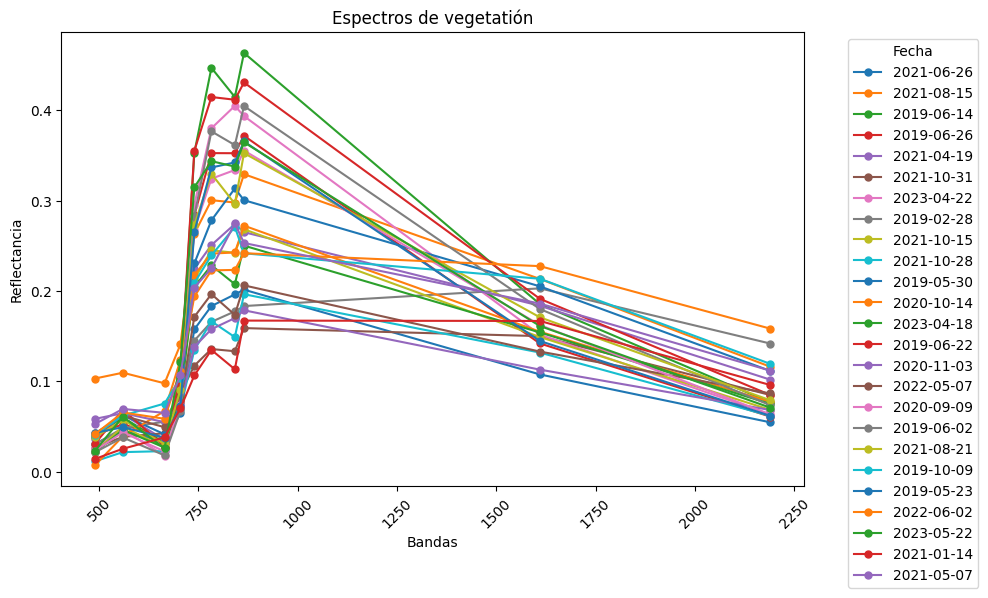

In [215]:
import matplotlib.pyplot as plt

# Graficar diferentes espectros
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura

for index, row in df_cross.sample(25).iterrows():
    plt.plot([longitudes_de_onda[band] for band in bandas], row[bandas], label=row['date_sat'].strftime('%Y-%m-%d'), marker='o', linestyle='-', markersize=5)

# Configuración del gráfico
plt.title("Espectros de vegetatión")
plt.xlabel("Bandas")
plt.ylabel("Reflectancia")
plt.legend(title="Fecha", bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera de la gráfica

# Mostrar gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas de las bandas
plt.tight_layout()  # Ajustar el espacio
plt.show()

C:\Users\josea\AppData\Local\Temp\ipykernel_27100\2050168211.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Elegir un mapa de colores (puedes cambiar 'viridis' por otro mapa como 'plasma', 'inferno', etc.)


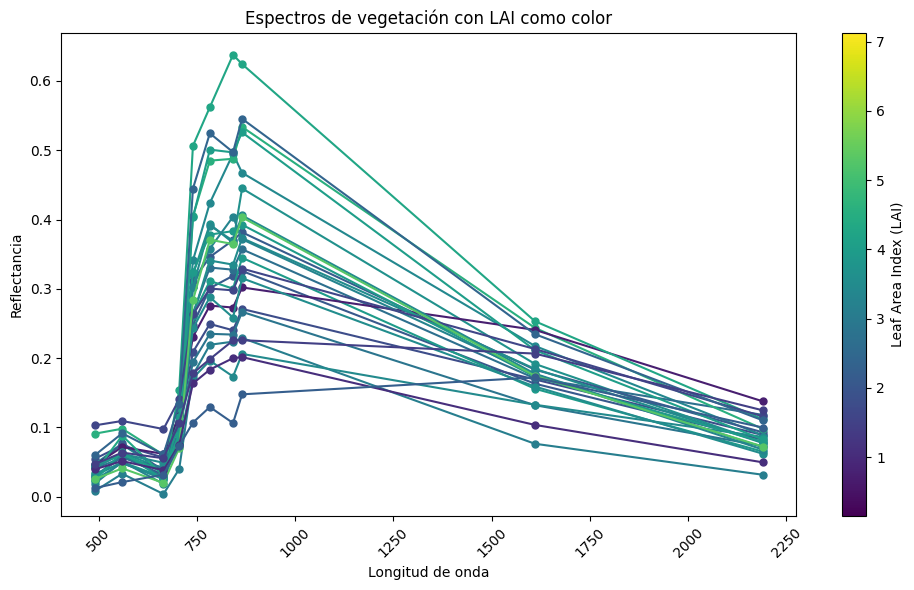

In [216]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Graficar diferentes espectros
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes object

# Crear una lista de colores basada en el valor de LAI
cmap = cm.get_cmap('viridis')  # Elegir un mapa de colores (puedes cambiar 'viridis' por otro mapa como 'plasma', 'inferno', etc.)
norm = plt.Normalize(df_cross['LAIe_Warren'].min(), df_cross['LAIe_Warren'].max())  # Normalizar el rango del LAI

for index, row in df_cross.sample(25).iterrows():
    # Obtener el valor del LAI para esta fila
    lai_value = row['LAIe_Warren']

    # Mapear el valor de LAI a un color
    color = cmap(norm(lai_value))  # Obtener el color correspondiente al LAI

    # Graficar el espectro, usando el valor del LAI como color de la línea
    ax.plot([longitudes_de_onda[band] for band in bandas], row[bandas], label=row['date_sat'].strftime('%Y-%m-%d'),
             marker='o', linestyle='-', markersize=5, color=color)

# Añadir barra de colores para mostrar la escala del LAI
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necesario para la barra de colores
fig.colorbar(sm, ax=ax, label='Leaf Area Index (LAI)') # Associate colorbar with the axes

# Configuración del gráfico
ax.set_title("Espectros de vegetación con LAI como color") # Use ax.set_title instead of plt.title
ax.set_xlabel("Longitud de onda") # Use ax.set_xlabel instead of plt.xlabel
ax.set_ylabel("Reflectancia") # Use ax.set_ylabel instead of plt.ylabel
#ax.legend(title="Fecha", bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera de la gráfica

# Mostrar gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas de las bandas
plt.tight_layout()  # Ajustar el espacio
plt.show()

In [217]:
df_cross.describe()

,longitude,latitude,time,B2,B3,B4,B5,B6,B7,B8,...,clumping_Warren_up,LAIe_Warren_down_err,clumping_Miller_down,clumping_Warren_down,clumping_Miller_up_err,clumping_Warren_up_err,clumping_Miller_down_err,clumping_Warren_down_err,LAIe_Warren,delta
count,671.000000,671.000000,671,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671
mean,-92.220667,35.855809,2021-02-22 14:47:42.668831744,0.036513,0.055786,0.039811,0.088566,0.238697,0.288514,0.293231,...,0.663852,0.058935,0.839755,0.852079,0.038905,0.059973,0.088405,0.159760,2.954812,2 days 01:03:54.576894187
min,-155.317365,19.553180,2018-03-14 16:44:19.527000,0.006900,0.016300,0.004000,0.020600,0.072500,0.086400,0.091000,...,0.238051,0.001157,0.510000,0.521330,0.014651,0.027582,0.024569,0.051279,0.147654,0 days 00:03:31.465000
25%,-95.192225,31.853811,2019-08-31 04:57:36.052000,0.024550,0.042900,0.025150,0.071350,0.180550,0.208450,0.221350,...,0.621735,0.021810,0.780000,0.798563,0.026022,0.041031,0.060000,0.110000,1.786661,0 days 19:24:04.669000
50%,-87.393231,37.033317,2021-05-23 16:15:14.799000064,0.032500,0.052400,0.034300,0.084300,0.235700,0.283500,0.286600,...,0.680000,0.039147,0.852553,0.868295,0.030000,0.050000,0.080000,0.140000,3.187371,1 days 16:44:55.077000
75%,-78.139506,39.060276,2022-06-08 16:57:55.583000064,0.044400,0.065750,0.046500,0.104650,0.289300,0.360300,0.357600,...,0.722104,0.080000,0.919257,0.928482,0.040000,0.060809,0.105452,0.195587,3.936421,3 days 02:27:35.821000
max,-71.287337,46.234042,2023-12-09 16:15:10.948000,0.140000,0.161400,0.162000,0.209700,0.506300,0.562000,0.643700,...,0.880000,0.400000,0.991323,0.995928,0.249363,0.239203,0.350937,0.747748,7.129325,4 days 23:53:24.251000
std,21.934666,7.024093,NaN,0.018272,0.020191,0.021506,0.025982,0.078892,0.100323,0.100832,...,0.090222,0.056412,0.096441,0.093948,0.030367,0.032154,0.043254,0.077570,1.460763,1 days 08:49:57.046646144


Exportamos el dataframe a un archivo csv

In [218]:
#df_cross.to_csv(drive_path + 'Sentinel2_SR_NEON_USA_LAI_2017_2024.csv')

### Mini EDA

Dividimos en train y test

In [219]:
df_cross = df_cross[~(df_cross['IGBP_class'] == 'Open Shrublands')]

In [220]:
df_cross['IGBP_class'].value_counts()

IGBP_class
Mixed Forest                   199
Deciduous Broadleaf Forest     122
Evergreen Needleleaf           119
Deciduous Broadleaf            107
Evergreen Broadleaf             59
Croplands                       38
Evergreen Needleleaf Forest     27
Name: count, dtype: int64

IGBP_class  
Mixed Forest                   230  
Evergreen Needleleaf           158  
Deciduous Broadleaf            138  
Deciduous Broadleaf Forest     134  
Grasslands                     117  
Evergreen Broadleaf             72  
Croplands                       67  
Open Shrublands                 33  
Evergreen Needleleaf Forest     30  
Name: count, dtype: int64

In [221]:
#df_cross = df_cross[~(df_cross.IGBP_class == 'Open Shrublands')]

In [222]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_cross, test_size=0.2, stratify=df_cross['IGBP_class'] ,random_state=42)
print(len(train_set))
print(len(test_set))

536
135


Definimos el target y las features

In [223]:
target = 'LAIe_Warren'

In [224]:
features = bandas
features

['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']

Definimos X_train, y_train

In [225]:
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

Vemos la distribución de la variable objetivo

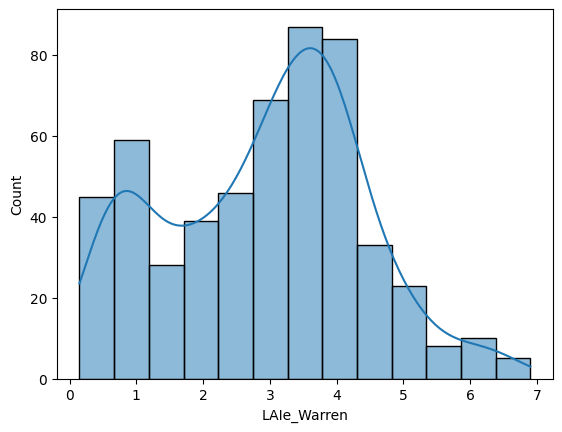

In [226]:
sns.histplot(x= target, data = train_set, kde = True);

Vemos las features (bandas) mas correlacionadas con el target

In [227]:
corr = train_set[features + [target]].corr()
np.abs(corr[target].sort_values(ascending = False))

LAIe_Warren    1.000000
B7             0.584350
B8A            0.579173
B6             0.533156
B8             0.530135
B3             0.013116
B2             0.023278
B5             0.118629
B11            0.153056
B4             0.367997
B12            0.431316
Name: LAIe_Warren, dtype: float64

<Axes: >

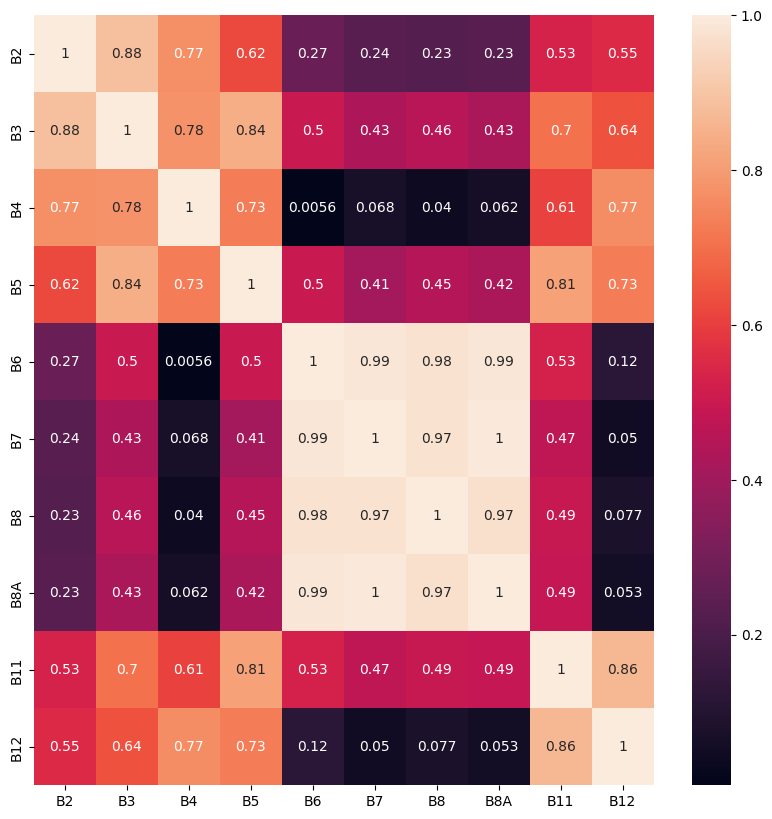

In [228]:
corr = train_set[features].corr()

plt.figure(figsize=(10,10))
sns.heatmap(abs(corr), annot=True)

<Axes: >

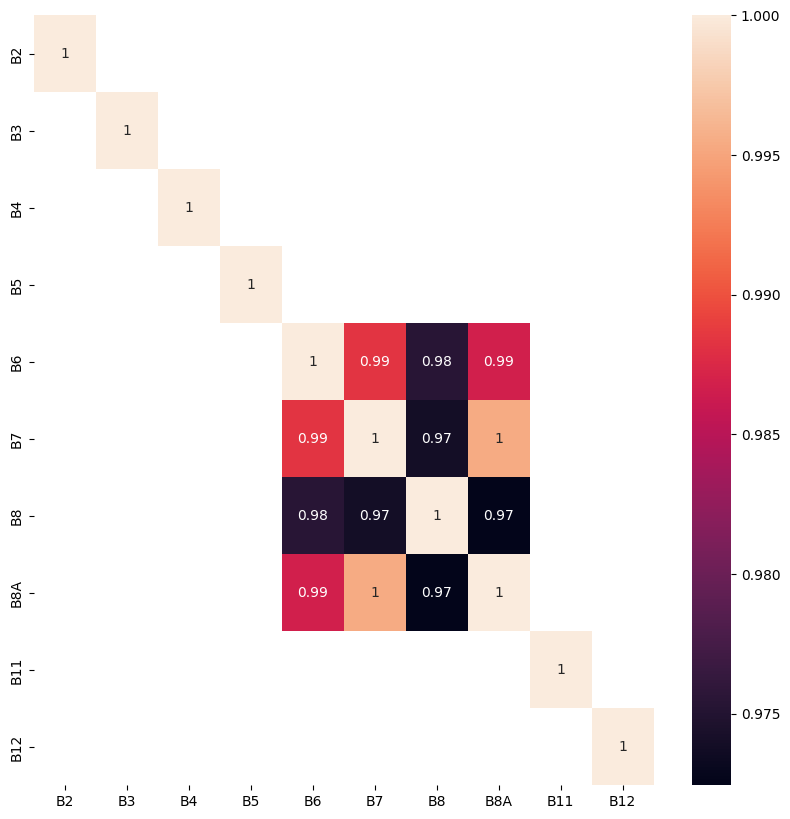

In [229]:
high_corr = corr[abs(corr) > 0.95]
plt.figure(figsize=(10,10))
sns.heatmap(abs(high_corr), annot=True)

La más alta correlación entre bandas es:  
B7-B8A del 100%.  
B6-B7 del 99%.  
B6-B8A del 99%.  
B7-B8 del 98%.  
B6-B8 del 97%.  
B8-B8A del 97%.


Descarto B8A y B6 que tienen una correlacion casi total con B7 que es la variable mas determinante en el target.

In [230]:
bandas_eliminar = ['B6','B8A']
bandas_sel = [banda for banda in bandas if banda not in bandas_eliminar]
bandas_sel

['B2', 'B3', 'B4', 'B5', 'B7', 'B8', 'B11', 'B12']

In [231]:
#features = bandas_sel
#bandas = bandas_sel

Feature selecction

In [232]:
from sklearn.ensemble import RandomForestRegressor

X = X_train[features]
Y = y_train

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X, Y)

names = X.columns
scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.2802,B7
1,0.2333,B8A
2,0.1549,B12
3,0.0965,B11
4,0.0450,B4
5,0.0429,B5
6,0.0407,B2
7,0.0388,B6
8,0.0356,B8
9,0.0320,B3


Vemos los outliers

In [233]:
'''import seaborn as sns

# Graficar boxplot para detectar outliers en las bandas seleccionadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[bandas])
plt.title("Detección de outliers en las bandas de Sentinel-2")
plt.xticks(rotation=45)
plt.show()'''

'import seaborn as sns\n\n# Graficar boxplot para detectar outliers en las bandas seleccionadas\nplt.figure(figsize=(12, 6))\nsns.boxplot(data=df[bandas])\nplt.title("Detección de outliers en las bandas de Sentinel-2")\nplt.xticks(rotation=45)\nplt.show()'

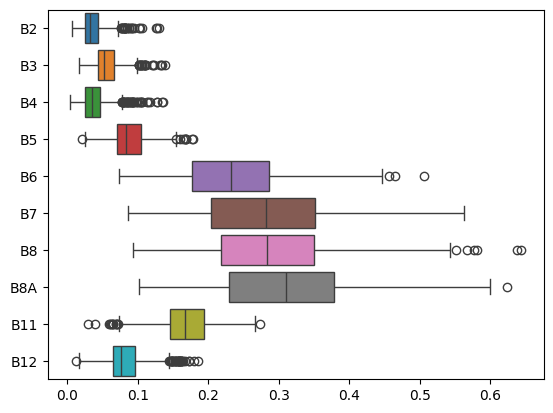

In [234]:
sns.boxplot(data = train_set[bandas], orient = "h");

### Preparacion de features

In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[bandas]), columns=bandas)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[bandas]), columns=bandas)

### Construccion de modelo base

#### Linear regression

In [236]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)


LinearRegression()

Para train

In [237]:
y_pred = lin_reg.predict(X_train_scaled)

In [238]:
argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_train_scaled, y_train))

MSE: 0.8605196698409663
RMSE: 0.9276419944358741
MAE: 0.7288662595622566
MAPE: 0.5059162436973317
R2: 0.6095671500035162


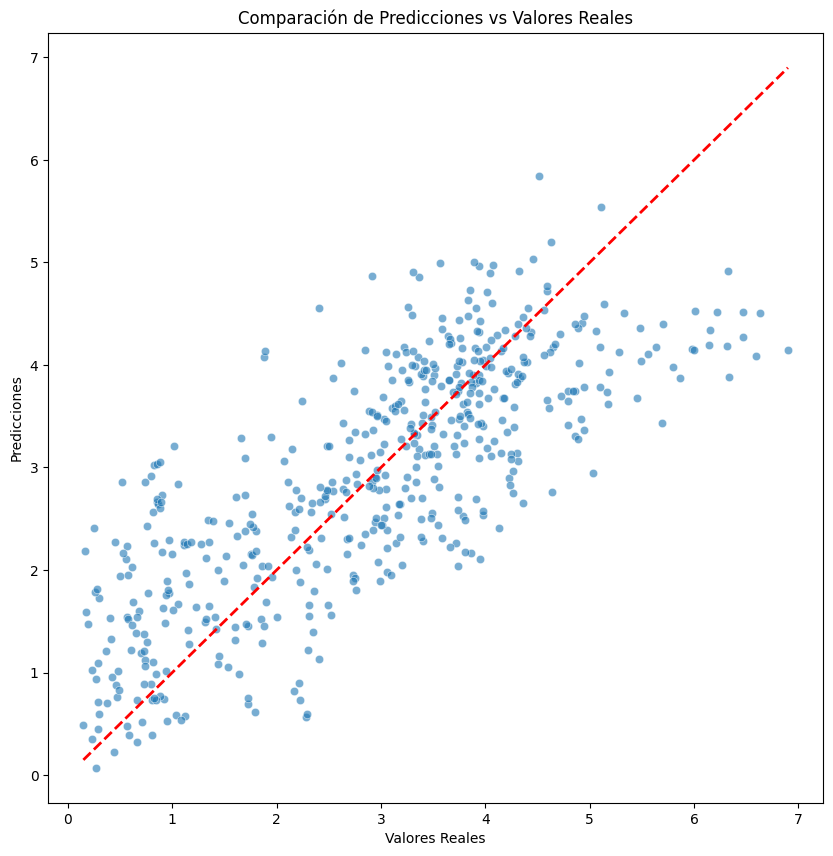

In [239]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_train, y=y_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

Para test

In [240]:
y_pred = lin_reg.predict(X_test_scaled)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_test_scaled, y_test))

MSE: 0.8085258519926871
RMSE: 0.8991806559266536
MAE: 0.7130145629801271
MAPE: 0.32062147323816365
R2: 0.5517508241628895


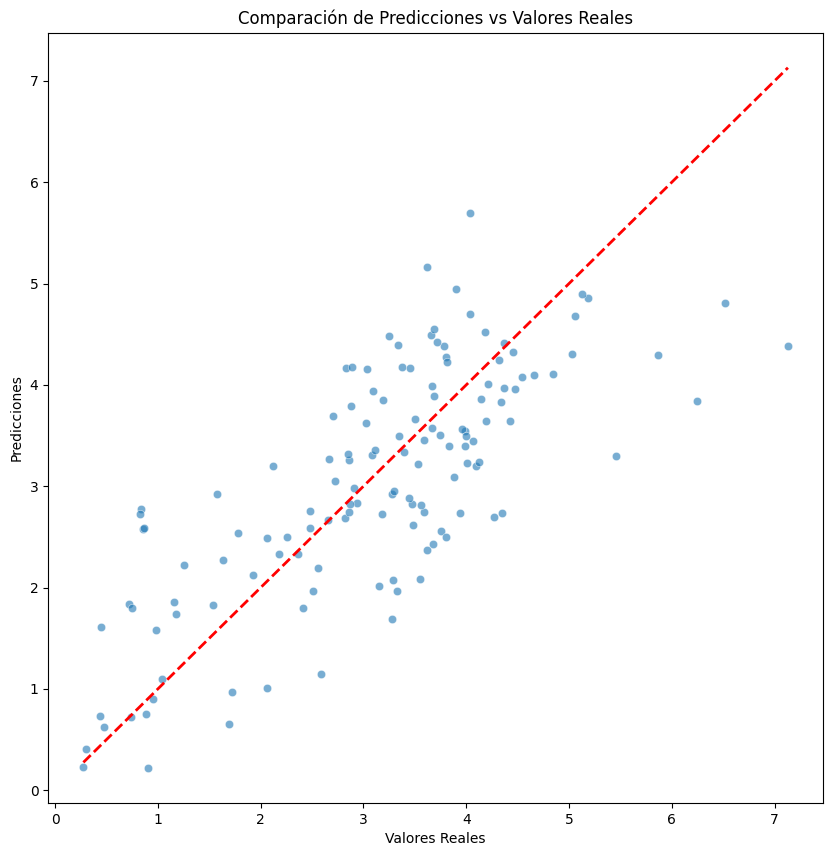

In [241]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

#### Elastic net

MSE: 0.8859117325658705
RMSE: 0.9412288417626558
MAE: 0.7289057901551471
MAPE: 0.35696182911109714
R2: 0.508847858100807


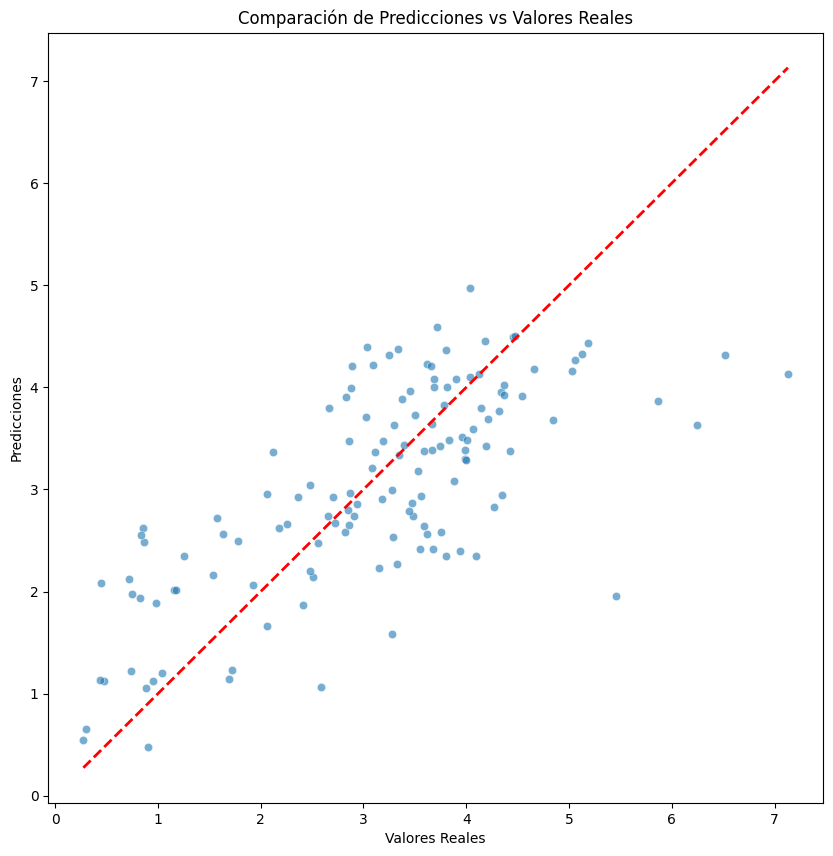

In [242]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha= 0.2, l1_ratio= 0.1)
elastic_reg.fit(X_train_scaled,y_train)
y_pred = elastic_reg.predict(X_test_scaled)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_reg.score(X_test_scaled, y_test))

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

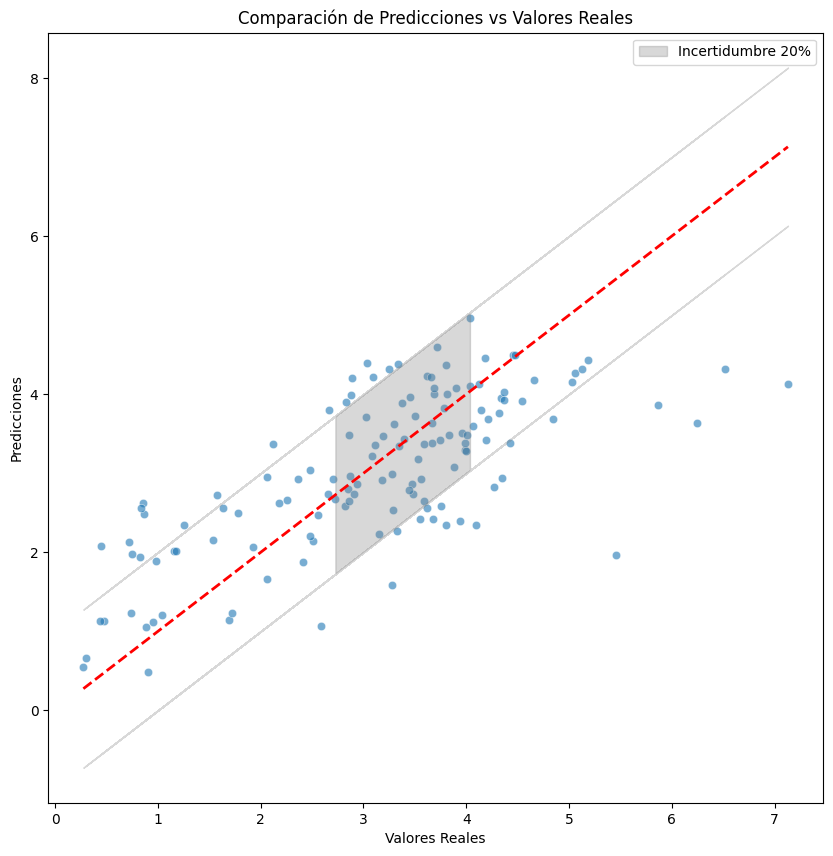

In [243]:
# Suponiendo que ya tienes y_test y y_pred definidos
plt.figure(figsize=(10, 10))

# Gráfico de dispersión
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Línea diagonal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Calcular el 20% de incertidumbre
uncertainty = 1

# Área sombreada (más y menos 20% de incertidumbre)
plt.fill_between(y_test, y_test - uncertainty, y_test + uncertainty, color='gray', alpha=0.3, label='Incertidumbre 20%')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')

# Leyenda
plt.legend()

# Mostrar gráfico
plt.show()


### Probar varios modelos. Comparación con Validación Cruzada (pre-optimización)

In [244]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

model_names = ["Regresion Lineal","Random Forest","XGBoost","LightGBM","CatBoost"]

lr = LinearRegression()
rf = RandomForestRegressor(random_state= 42)
xgb = XGBRegressor(random_state = 42)
lgb = LGBMRegressor(random_state= 42, verbose = -100)
cat  = CatBoostRegressor(random_state= 42, verbose = False)


model_set = [lr, rf, xgb, lgb, cat]

In [245]:
from sklearn.model_selection import cross_val_score

metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "Regresion Lineal":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "neg_mean_absolute_percentage_error")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "neg_mean_absolute_percentage_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LinearRegression()
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
LGBMRegressor(random_state=42, verbose=-100)


In [246]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, MAPE: {(-np.mean(valores))}")
print(f"El ganador es {ganador}")

Model <Regresion Lineal>, MAPE: 0.5258726109549247
Model <Random Forest>, MAPE: 0.4834650778943788
Model <XGBoost>, MAPE: 0.5213509267110235
Model <LightGBM>, MAPE: 0.5015124838901349
Model <CatBoost>, MAPE: 0.4737536051710134
El ganador es CatBoost


In [247]:
'''for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")
print(f"El ganador es {ganador}")'''

'for model_name, valores in metricas_cv.items():\n    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")\nprint(f"El ganador es {ganador}")'

### Optimizacion del modelo ganador


In [248]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    "n_estimators": [50,100,200,400], # 100 es el valor por defecto 
    "max_depth": [5,10,15,None], # None es el valor por defecto
    "min_samples_leaf": [5,10,15], # 1 es el valor por defecto. Pero sobreajustaria mucho el modelo
    'min_samples_split': [2,5,10], # 2 es el valor por defecto    
    "max_features": ["sqrt","log2",None], # 1.0 (ó None) es el valor por defecto
    "max_samples": [0.3,0.6,1.0] # 1.0 (ó None) es el valor por defecto
}

rf_grid = GridSearchCV(rf,
                       param_grid= params_grid,
                       cv = 5,
                       scoring = "neg_root_mean_squared_error",
                       n_jobs = -1)

rf_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
-rf_grid.best_score_

1.1938792103018705

In [ ]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': None,
 'max_samples': 1.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
y_pred = rf_grid.best_estimator_.predict(X_test)
y_pred = pd.Series(y_pred, index=X_test.index, name='Predictions')

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_reg.score(X_test, y_test))

MSE: 1.48575098811153
RMSE: 1.2189138559026762
MAE: 0.9704579275306058
MAPE: 0.30662785962337624
R2: 0.07438436516129543


In [249]:
df_res = pd.DataFrame(y_test)

In [250]:
df_res['pred'] = y_pred

In [251]:
df_res['Class'] = test_set['IGBP_class']

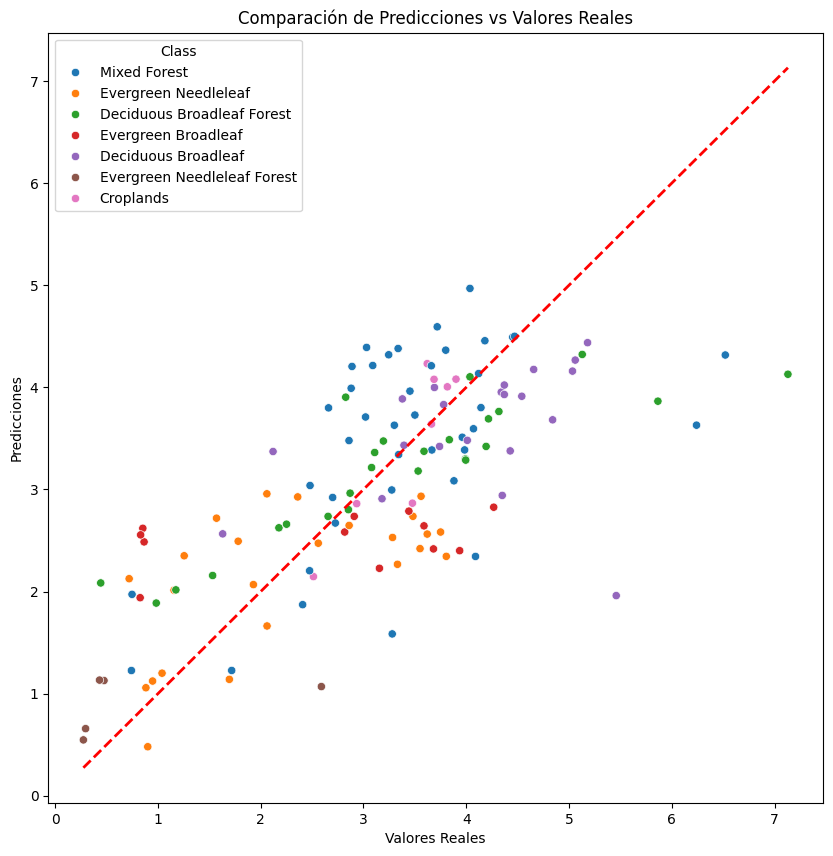

In [253]:
plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_res, x="LAIe_Warren", y="pred", hue="Class")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()


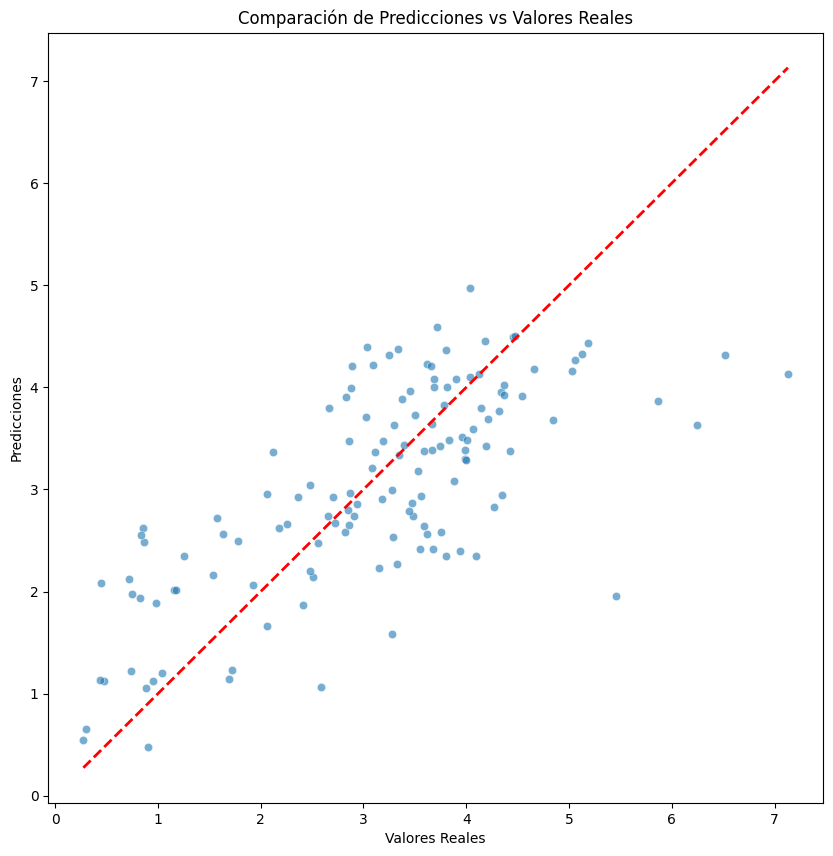

In [254]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

### Analisis de errores

Calculamos los residuos y vemos la distribución de esos errores.

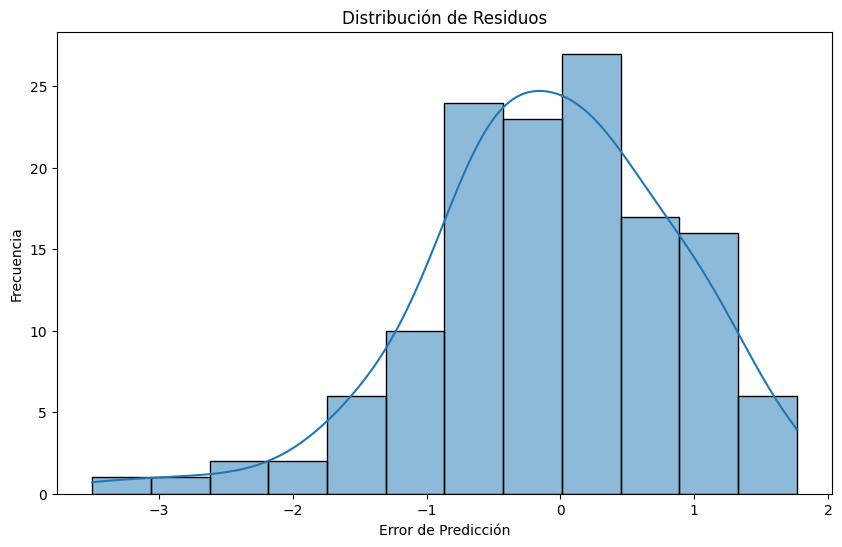

In [255]:
# Calcular residuos
residuos = y_pred - y_test

# Visualización de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

Graficamos los residuos según el valor real para intentar ver patrones donde se concentran los errores.

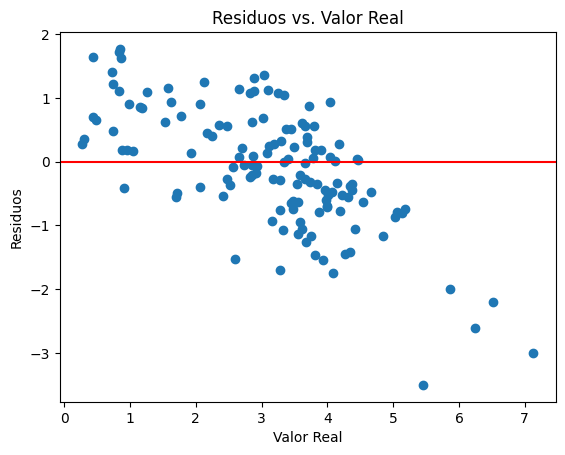

In [256]:
# Gráfica de dispersión de residuos
plt.scatter(y_test, residuos)
plt.title('Residuos vs. Valor Real')
plt.xlabel('Valor Real')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [257]:
residuos

162   -0.055653
41    -0.086678
441    0.447008
264   -0.234359
569   -0.387259
         ...   
118   -0.554410
371   -0.529505
480    0.280424
243    1.112664
157    0.932533
Name: LAIe_Warren, Length: 135, dtype: float64

In [258]:
test_set.columns

Index(['id', 'longitude', 'latitude', 'time', 'B2', 'B3', 'B4', 'B5', 'B6',
       'B7', 'B8', 'B8A', 'B11', 'B12', 'SCL', 'QA60', 'Site_sat', 'GBOV_ID',
       'Site', 'GROUND_DATA_PI', 'GROUND_DATA_PIs_Email', 'GBOV_Email',
       'Network', 'Elevation', 'IGBP_class', 'Lat_IS', 'Lon_IS', 'TIME_IS',
       'Version', 'up_flag', 'down_flag', 'LAI_Miller_up', 'LAI_Warren_up',
       'LAIe_Miller_up', 'LAIe_Warren_up', 'LAI_Miller_down',
       'LAI_Warren_down', 'LAIe_Miller_down', 'LAIe_Warren_down',
       'LAI_Miller_up_err', 'LAI_Warren_up_err', 'LAIe_Miller_up_err',
       'LAIe_Warren_up_err', 'clumping_Miller_up', 'clumping_Warren_up',
       'LAI_Miller_down_err', 'LAI_Warren_down_err', 'LAIe_Miller_down_err',
       'LAIe_Warren_down_err', 'clumping_Miller_down', 'clumping_Warren_down',
       'clumping_Miller_up_err', 'clumping_Warren_up_err',
       'clumping_Miller_down_err', 'clumping_Warren_down_err', 'LAIe_Warren',
       'delta', 'date_sat', 'date_insitu'],
      dtype='

In [269]:
test_set[abs(residuos) >= 2][['time','TIME_IS','delta','Site','IGBP_class','LAIe_Warren','LAIe_Warren_up','LAIe_Warren_up','clumping_Warren_up','clumping_Warren_down','clumping_Warren_up_err','clumping_Warren_down_err']]

,time,TIME_IS,delta,Site,IGBP_class,LAIe_Warren,LAIe_Warren_up,LAIe_Warren_up,clumping_Warren_up,clumping_Warren_down,clumping_Warren_up_err,clumping_Warren_down_err
655,2022-08-05 16:44:28.545,2022-08-03 07:34:00,2 days 09:10:28.545000,Dead Lake,Deciduous Broadleaf,5.458865,3.249966,3.249966,0.612561,0.802450,0.038361,0.097824
455,2020-06-23 17:22:56.066,2020-06-22 07:21:00,1 days 10:01:56.066000,University of Kansas Field Site,Deciduous Broadleaf Forest,5.864354,2.731222,2.731222,0.646524,0.701148,0.045128,0.096890
432,2018-06-01 17:12:55.191,2018-05-30 20:19:00,1 days 20:53:55.191000,University of Kansas Field Site,Deciduous Broadleaf Forest,7.129325,2.454330,2.454330,0.676927,0.691088,0.040597,0.061076
276,2020-08-11 16:12:30.834,2020-08-12 07:05:00,0 days 14:52:29.166000,Smithsonian Conservation Biology Institute,Mixed Forest,6.240000,2.450000,2.450000,0.620000,0.690000,0.040000,0.080000
274,2020-07-02 16:12:29.042,2020-06-30 19:37:00,1 days 20:35:29.042000,Smithsonian Conservation Biology Institute,Mixed Forest,6.520000,2.680000,2.680000,0.560000,0.640000,0.040000,0.070000


<Axes: xlabel='clumping_Warren_down_err', ylabel='Count'>

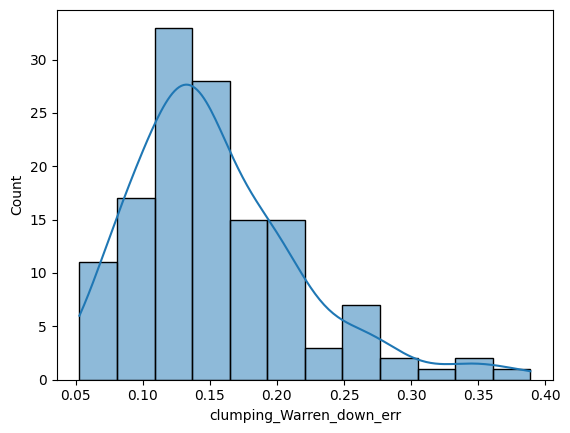

In [271]:
sns.histplot(test_set['clumping_Warren_down_err'], kde=True)

In [260]:
test_set.IGBP_class.value_counts()

IGBP_class
Mixed Forest                   40
Deciduous Broadleaf Forest     25
Evergreen Needleleaf           24
Deciduous Broadleaf            21
Evergreen Broadleaf            12
Croplands                       8
Evergreen Needleleaf Forest     5
Name: count, dtype: int64

In [261]:
train_set.IGBP_class.value_counts()

IGBP_class
Mixed Forest                   159
Deciduous Broadleaf Forest      97
Evergreen Needleleaf            95
Deciduous Broadleaf             86
Evergreen Broadleaf             47
Croplands                       30
Evergreen Needleleaf Forest     22
Name: count, dtype: int64

In [262]:
df_cross['date_sat'] = pd.to_datetime(df_cross['date_sat'])

In [263]:
test_set['IGBP_class'].value_counts()

IGBP_class
Mixed Forest                   40
Deciduous Broadleaf Forest     25
Evergreen Needleleaf           24
Deciduous Broadleaf            21
Evergreen Broadleaf            12
Croplands                       8
Evergreen Needleleaf Forest     5
Name: count, dtype: int64

<Axes: xlabel='IGBP_class', ylabel='Count'>

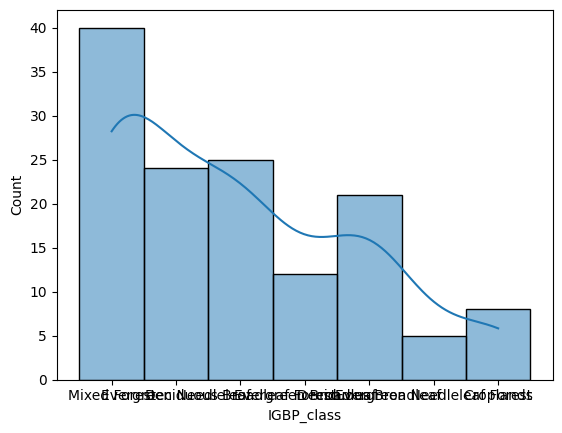

In [264]:

sns.histplot(test_set['IGBP_class'], kde=True)

<Axes: xlabel='date_sat', ylabel='Count'>

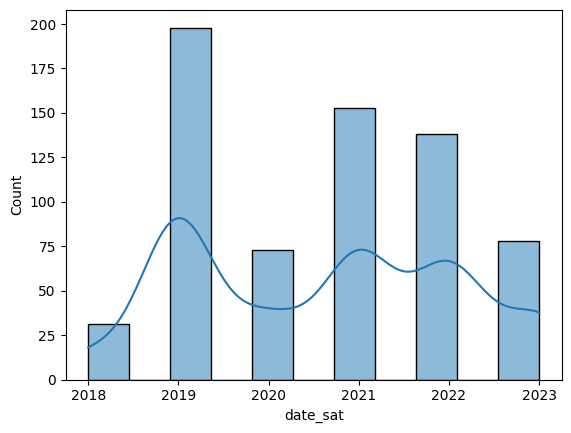

In [265]:
sns.histplot(df_cross['date_sat'].dt.year, kde=True)